# BLG 454E Term Project

## Team 2

### Fatih Baskın
#### 150210710

### Bilgenur Çelik
#### 150200063

# 1 Exploratory Data Analysis

## 1.1 Data Description and Data Types

From the feature description, we know that there are 7 histogram variables, corresponding to 70 features. From checking the column names manually, we have found that colums with these names:
* ag_000 to ag_009
* ay_000 to ay_008
* az_000 to az_009
* ba_000 to ba_009
* cn_000 to ba_009
* cn_000 to cn_009
* cs_000 to cs_009
* ee_000 to ee_009

are indeed histogram variables. Those are different from the rest of the data, which are just counters.

Also, from the kaggle challenge website, we have found out that most of the variables have 'na' values, which means NULL, we need to handle this issue.

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training_data_frame = pd.read_csv('data/aps_failure_training_set.csv', na_values='na')
print(training_data_frame.shape)
training_data_frame.head(5)

print(training_data_frame['class'].value_counts())

(60000, 172)
class
neg    59000
pos     1000
Name: count, dtype: int64


In [222]:
testing_data_frame = pd.read_csv('data/aps_failure_test_set.csv', na_values='na')
print(testing_data_frame.shape)
testing_data_frame.head(5)

(16000, 171)


,id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,2,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,3,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,4,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,5,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


Data has 60000 rows and 170 features.
with 59000 negative and 1000 positive. pos/neg ratio is imbalanced.
Undersampling can be applied over the majority which is neg rows

Feature names are encoded, it is harder for human interpretation.


## 1.2 Null Values

In [223]:
column_names = training_data_frame.columns.tolist()
null_count = training_data_frame.isnull().sum()
null_percent = null_count / training_data_frame.shape[0] * 100

show_null_info = pd.DataFrame({'null_count': null_count, 'null_percent': null_percent})
show_null_info.sort_values(by='null_percent', ascending=False, inplace=True)

show_null_info.head(10)

,null_count,null_percent
br_000,49264,82.106667
bq_000,48722,81.203333
bp_000,47740,79.566667
bo_000,46333,77.221667
cr_000,46329,77.215000
ab_000,46329,77.215000
bn_000,44009,73.348333
bm_000,39549,65.915000
bl_000,27277,45.461667
bk_000,23034,38.390000


As the result of counting nulls in the columns, the null counts are very severe in the given columns:
| column | null% | column | null% | column | null% | column | null% | column | null% | column | null% | column | null% |
| ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- |
| br_000 | 0.821 | bq_000 | 0.812 | bp_000 | 0.796 | bo_000 | 0.772 | cr_000 | 0.772 | ab_000 | 0.772 | bn_000 | 0.733 |
| bm_000 | 0.659 | bl_000 | 0.455 | bk_000 | 0.384 | cf_000 | 0.248 | cg_000 | 0.248 | ch_000 | 0.248 | co_000 | 0.248 |
| ad_000 | 0.248 | cv_000 | 0.230 | da_000 | 0.230 | cz_000 | 0.230 | cy_000 | 0.230 | cx_000 | 0.230 | db_000 | 0.230 |
| cu_000 | 0.230 | ct_000 | 0.230 | dc_000 | 0.230 | ec_00  | 0.171 | cm_000 | 0.165 | cl_000 | 0.159 | ed_000 | 0.159 |

We can drop these columns since they are mostly null.

In [224]:
# check for unnecessary columns where standard deviation is 0
numeric_columns = training_data_frame.select_dtypes(include='number').columns # this will prevent "class" column from being included
std_per_column = training_data_frame[numeric_columns].std()
unn_cols = std_per_column[std_per_column == 0].index
print(unn_cols)

Index(['cd_000'], dtype='object')


'cd_000' has std deviation 0. It needs to be dropped.

### 1.2.1 Null Columns Bar Graph

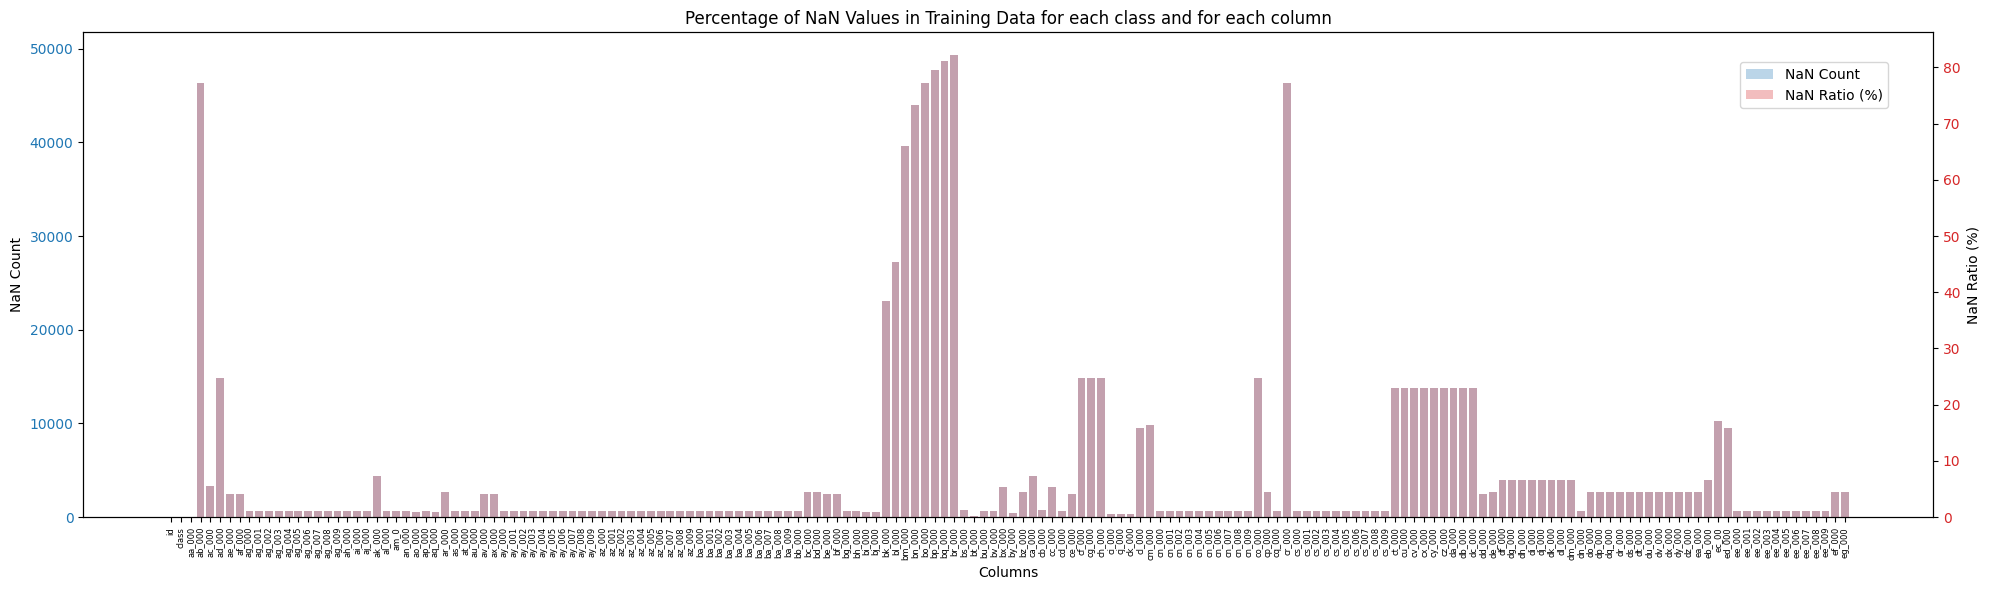

In [225]:
# Drop columns with more than 70% missing values
# plot how many na values and raito of na values in each column
na_count = training_data_frame.isnull().sum()
na_ratio = na_count / training_data_frame.shape[0] * 100
na_examination_df = pd.DataFrame(list(zip(training_data_frame.columns, na_count, na_ratio)), columns=['Column', 'NaN Count', 'NaN Ratio (%)'])

fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90, fontsize=6)
# plot NaN count
ax1.bar(na_examination_df['Column'], na_examination_df['NaN Count'], color='tab:blue', alpha=0.3, label='NaN Count')
ax1.set_xlabel('Columns')
ax1.set_ylabel('NaN Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plot NaN ratio
ax2 = ax1.twinx()
ax2.bar(na_examination_df['Column'], na_examination_df['NaN Ratio (%)'], color='tab:red', alpha=0.3, label='NaN Ratio (%)')
ax2.set_ylabel('NaN Ratio (%)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# set title and legend
plt.title('Percentage of NaN Values in Training Data for each class and for each column')
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.9))


plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

### 1.2.1 Null Columns HeatMap

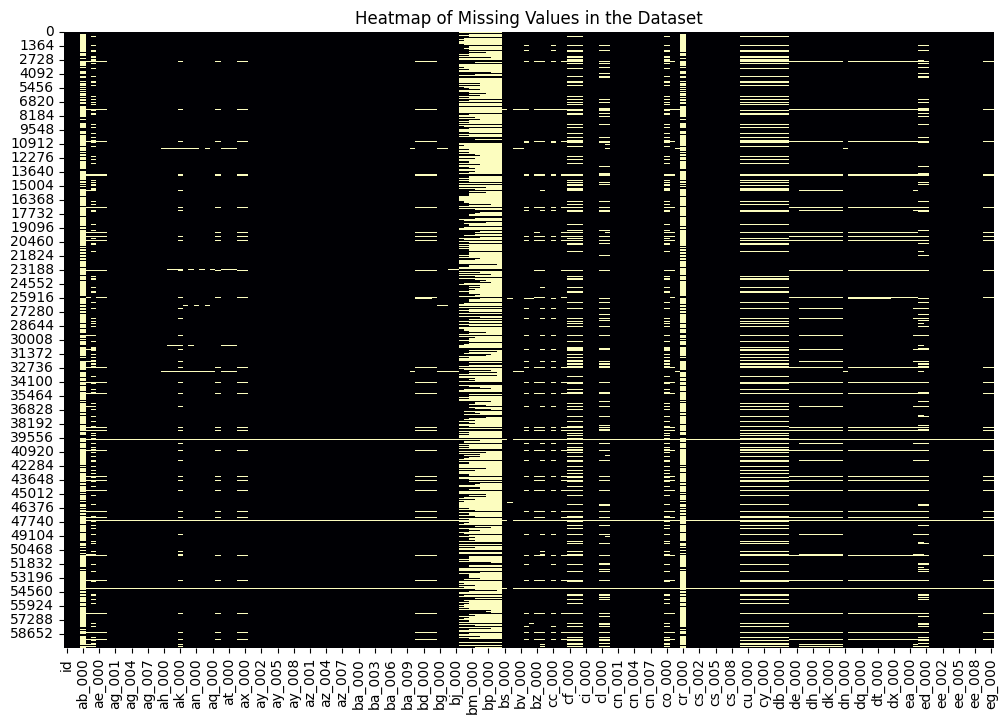

In [226]:
# heatmap of the missing values in the dataset
plt.figure(figsize=(12,8)) # You can adjust the figure size as per your requirement
sns.heatmap(training_data_frame.isnull(), cbar=False, cmap='magma')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

## 1.3 Correlation of Features

['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']


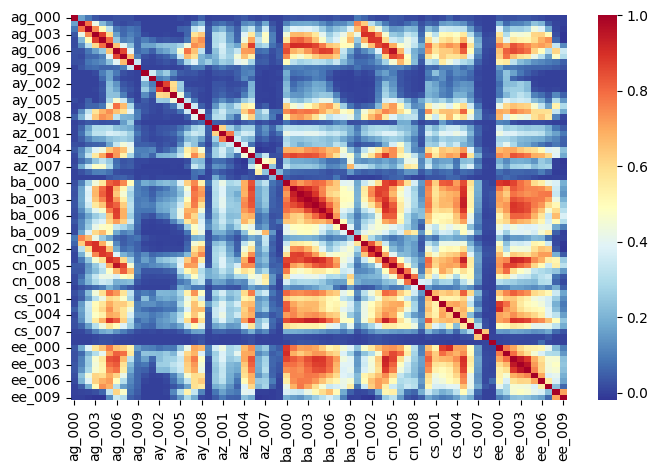

26
{'cs_003', 'ba_002', 'cs_005', 'cn_006', 'ee_001', 'ee_002', 'cs_002', 'cn_001', 'ba_003', 'cn_004', 'ee_004', 'ee_000', 'az_005', 'ag_004', 'cs_000', 'ba_001', 'cn_003', 'ba_004', 'ba_000', 'ba_005', 'ay_003', 'cn_005', 'ag_007', 'ba_006', 'ee_003', 'cn_002'}


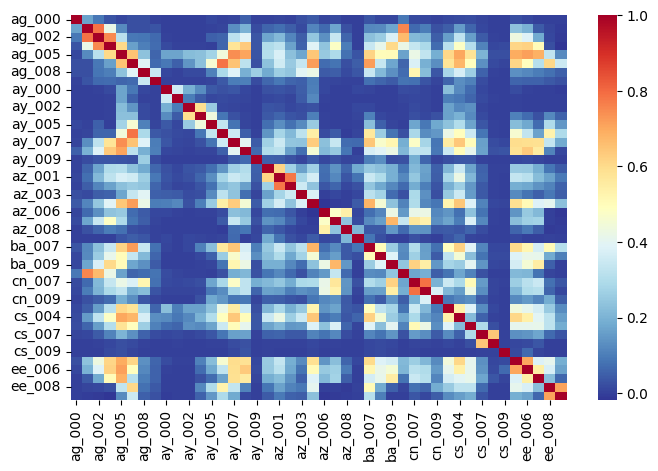

In [227]:
from collections import Counter

def get_tag(name):
    return name.split("_")[0]

all_columns_with_tags = [a for a in training_data_frame.columns if "_" in a] # Selecting columns having "_" in name.
all_tags = [get_tag(a) for a in all_columns_with_tags] # Selecting all Identifier name only ex:- ["aa","ab"....].
unique_col = list(set(all_tags)) # Selecting all unique Identifier. 
col_count = [v for k,v in Counter(all_tags).items()] # Calcution of Count of each unique Identifier.

# Select tags with 10 attributes each
hists = [k for k, v in Counter(all_tags).items() if v == 10]
print(hists)
hists_columns = [k for k in all_columns_with_tags if get_tag(k) in hists]

# Create a dictionary to store columns for each tag
hists_dict = {k: [col for col in hists_columns if k in col] for k in hists if get_tag(k) in hists}

# Create a new matrix for columns with 10 attributes each
new_matrix = training_data_frame[hists_columns].copy()
#data_frame.drop(hists_columns, axis=1, inplace=True)

train_corr = new_matrix.corr()
plt.figure(figsize=(8, 5))
trace = sns.heatmap(train_corr, cmap=plt.cm.RdYlBu_r)
plt.show()

# Find the columns with high correlation, greater than 0.8
high_corr_cols = set()
for i in range(len(train_corr.columns)):
    for j in range(i):
        if abs(train_corr.iloc[i, j]) > 0.8:
            colname = train_corr.columns[i]
            high_corr_cols.add(colname)

print(len(high_corr_cols))
print(high_corr_cols)
new_matrix = new_matrix.drop(columns=high_corr_cols)

# Plot the updated correlation matrix
plt.figure(figsize=(8, 5))
trace = sns.heatmap(new_matrix.corr(), cmap=plt.cm.RdYlBu_r)
plt.show()


Before & after dropping highly correlated fields.

# 2 Data Preprocessing

## 2.1 Dropping Columns

Before starting the dimensionality reduction & training, some preprocessing must be done. First, the column with null values and column with zero variance must be dropped. Then, if necessary, highly correlated features might be dropped.

In [228]:
# 0 std
training_data_frame = training_data_frame.drop(columns='cd_000')

# 70% missing values
cols_to_drop = []
for col in training_data_frame.columns:
    if training_data_frame[col].isna().mean() > 0.70:
        cols_to_drop.append(col)

training_data_frame = training_data_frame.drop(columns=cols_to_drop)

# 0.8 correlation
# training_data_frame = training_data_frame.drop(columns=high_corr_cols)

# print(training_data_frame.shape)

## 2.2 Normalization

Normalization is required for training the models easily and to be able to apply dimensionality reduction easily. We have written not-null dependent normalizers. 

In [229]:
def zscore_normalize(data, clipping=False, clip_min_percentile=0, clip_max_percentile=100):
    if (clipping):
        data = clipping_normalize(
            data, clip_min_percentile, clip_max_percentile)

    columns_mean = np.nanmean(data, axis=0)
    columns_std = np.nanstd(data, axis=0)
    # If the standard deviation is 0, then we set it to 1
    columns_std[columns_std == 0] = 1
    normalized_data = (data - columns_mean) / columns_std
    return normalized_data, columns_mean, columns_std


# Normalizing the data by cramming them in between 0 and 1
def minmax_normalize(data, clipping=False, clip_min_percentile=0, clip_max_percentile=100):
    if (clipping):
        data = clipping_normalize(
            data, clip_min_percentile, clip_max_percentile)

    columns_min = np.nanmin(data, axis=0)
    columns_max = np.nanmax(data, axis=0)
    columns_minmax = columns_max - columns_min
    # If the min and max values are the same, then we set the max value to 1
    columns_minmax[columns_minmax == 0] = 1
    normalized_data = (data - columns_min) / columns_minmax
    return normalized_data, columns_min, columns_minmax


# Normalizing the data by clipping them in their percentiles (between 0 and 100)
def clipping_normalize(data, clip_min_percentile=0, clip_max_percentile=100):
    # Get the min and max values from the data by their percentiles
    clip_min = np.nanpercentile(data, clip_min_percentile)
    clip_max = np.nanpercentile(data, clip_max_percentile)
    # We want to leave nans as they are
    nan_mask = np.isnan(data)
    def clipper(x): return np.clip(x, clip_min, clip_max)
    # Apply the clipper function to the data with leaving the nan values as they are
    clipped_data = np.where(nan_mask, data, clipper(data))
    return clipped_data


def applyZscoreNormalization(data, mean, std):
    normalized_data = (data - mean) / std
    return normalized_data


def applyMinmaxNormalization(data, min, minmax):
    normalized_data = (data - min) / minmax
    return normalized_data


Here, we have two different normalizers, the z-score normalizer, which normalizes the data using $x_i = \frac{x_i - \mu}{\sigma}$ formula, making the data have 0 mean and 1 standard deviation. The other normalizer is the min-max normalizer, which normalizes the data with $x_i = \frac{x_i - min}{max - min}$, making the data scale in the $(0,1)$ range.

In our training model, we have used z-score normalization.

## 2.3 Imputing

Imputing stands for filling in the null values, we had to use sckit-learn's SimpleImputer library for this functionality. There are essentially five types of imputing methods.

* Constant Fill: Fill null values with a constant value (0)
* Mean Fill: Fill the null values with the mean of that column
* Median Fill: Fill the null values with the meadian of that column, more resiliant against outlier effect compared to mean fill.
* Random Fill: Fill in the null values with unit noise (0 mean, 1 std)
* Most Frequent: Fill in the null values with the most frequent element in that column.

In [230]:
from sklearn.impute import SimpleImputer


# Impute the missing values with usage of the mean value:
def imputeMean(data):
    imputer = SimpleImputer(missing_values=np.nan,
                            strategy='mean', copy=True)
    imputed_data = imputer.fit_transform(data)
    return imputed_data


# Impute the missing values with usage of the median value:
def imputeMedian(data):
    imputer = SimpleImputer(missing_values=np.nan,
                            strategy='median', copy=True)
    imputed_data = imputer.fit_transform(data)
    return imputed_data


# Impute the missing values with usage of the most frequent value:
def imputeMostFrequent(data):
    imputer = SimpleImputer(missing_values=np.nan,
                            strategy='most_frequent', copy=True)
    imputed_data = imputer.fit_transform(data)
    return imputed_data


# Impute the missing values with usage of the constant value:
def imputeConstant(data, fill_value=0):
    imputer = SimpleImputer(missing_values=np.nan, strategy='constant',
                            fill_value=fill_value, copy=True)
    imputed_data = imputer.fit_transform(data)
    return imputed_data


# Impute the missing values with a random noise:
def imputeRandomFill(data):
    random_data = np.random.randn(data.shape[0], data.shape[1])
    imputed_data = np.where(np.isnan(data), random_data, data)
    return imputed_data


We have tried different imputing methods in our training.

## 2.4 Dimensionality Reduction

There were three methods that we can apply, PCA, LDA and Factor Analysis (FA).

### 2.4.1 PCA

In [231]:
def pca(data, num_components=2):
    # Calculating the covariance matrix
    covariance_matrix = np.cov(data, rowvar=False)
    # Calculating the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sorting eigenvector and values in the descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:, idx]
    eigenvalues = eigenvalues[idx]

    # Selecting the first num_components eigenvectors
    components = eigenvectors[:, 0:num_components]
    component_eigenvalues = eigenvalues[0:num_components]

    # Projecting the data on the components
    projected_data = np.dot(data, components)

    return projected_data, components, component_eigenvalues


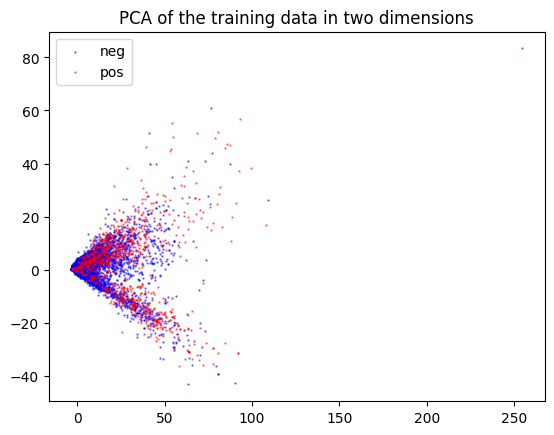

In [232]:
# Get the data from the training dataset
training_class = training_data_frame['class'].values
training_data = training_data_frame.drop(columns=['id', 'class']).values


# Apply the zscore normalization to the data
training_data, training_data_mean, training_data_std = zscore_normalize(training_data)

# Impute the missing values with the mean value
training_data = imputeMean(training_data)

pca_data, components, component_eigenvalues = pca(training_data, 2)

neg_indices = np.where(training_class == 'neg')
pca_neg_values = pca_data[neg_indices]

pos_indices = np.where(training_class == 'pos')
pca_pos_values = pca_data[pos_indices]

plt.scatter(pca_neg_values[:, 0], pca_neg_values[:, 1], s=0.5, alpha=0.5, c='b', label='neg')
plt.scatter(pca_pos_values[:, 0], pca_pos_values[:, 1], s=0.5, alpha=0.5, c='r', label='pos')
plt.title('PCA of the training data in two dimensions')
plt.legend()
plt.show()


As you can see from the two dimensional plot, PCA does a terrible job to seperate the datas into two groups, neg and pos classes are intertwined in the graph.

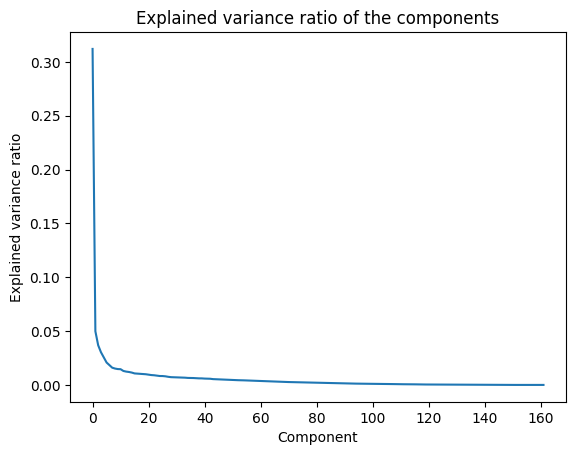

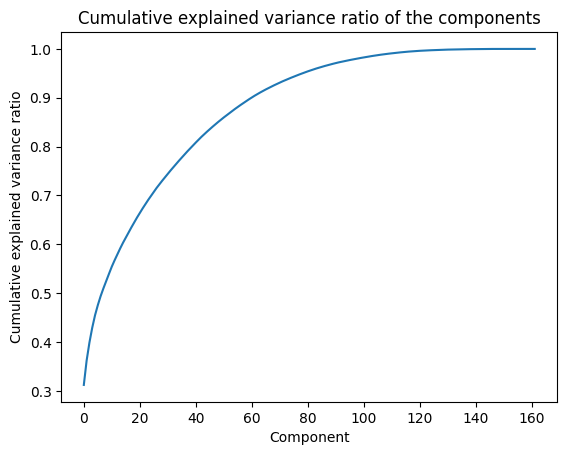

In [233]:
# To get explained variance ratio
pca_data, components, component_eigenvalues = pca(training_data, training_data.shape[1])

eigenvalues_sum = np.sum(component_eigenvalues)

# Plot the explained variance ratio
plt.plot(component_eigenvalues / eigenvalues_sum)
plt.title('Explained variance ratio of the components')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio')
plt.show()

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(component_eigenvalues / eigenvalues_sum))
plt.title('Cumulative explained variance ratio of the components')
plt.xlabel('Component')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


PCA covers the 95% of the variance about 80 components

## 2.4.1 LDA

In [234]:
def lda(data, labels, num_components):
    # data: (n_samples x n_features)
    # labels: (n_samples)
    # num_components: number of linear discriminants to return
    # returns: (n_samples x num_components), components, eigenvalues

    unique_classes = np.unique(labels)
    num_features = data.shape[1]
    num_samples = data.shape[0]

    # Split data per class
    data_per_class = {}
    data_size_per_class = {}

    for class_label in unique_classes:
        class_indices = np.where(labels == class_label)
        class_data = data[class_indices]
        data_per_class[class_label] = class_data
        data_size_per_class[class_label] = class_data.shape[0]

    # Overall mean
    mean_overall = np.mean(data, axis=0) / num_samples

    # Class means
    means_per_class = {}
    for class_label in unique_classes:
        class_data = data_per_class[class_label]
        class_data_size = data_size_per_class[class_label]
        means_per_class[class_label] = np.mean(
            class_data, axis=0) / class_data_size

    # Within class scatter
    Sw = np.zeros((num_features, num_features))
    for class_label in unique_classes:
        class_data = data_per_class[class_label]
        class_mean = means_per_class[class_label]
        # Sizes of the matrices after subtraction is N_samples x N_features
        # Therefore the transpose of the first matrix is taken
        subtracted_class_data = class_data - class_mean
        Sw += np.dot(subtracted_class_data.T, subtracted_class_data)

    # Between class scatter
    Sb = np.zeros((num_features, num_features))
    for class_label in unique_classes:
        class_mean = means_per_class[class_label]
        mean_difference = class_mean - mean_overall
        # Sizes of the matrices after outer product is N_features x N_features
        Sb += data_size_per_class[class_label] * \
            np.outer(mean_difference, mean_difference)

    # Get the inverse of Sw, sometimes it comes as a singular matrix
    try:
        Sw_inverse = np.linalg.inv(Sw)
    except np.linalg.LinAlgError:
        # If the matrix is singular, then add a small value to the diagonal
        Sw_inverse = np.linalg.inv(Sw + 0.0001 * np.eye(num_features))

    Sw_inverse = np.real(Sw_inverse)

    # Get eigenvalues and eigenvectors of Sw_inverse * Sb
    SwSb = np.dot(Sw_inverse, Sb)
    eigenvalues, eigenvectors = np.linalg.eig(SwSb)

    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices][:num_components]
    eigenvectors = eigenvectors[:, sorted_indices][:, :num_components]

    # Project the data onto eigenvectors
    projected_data = np.dot(data, eigenvectors)

    return projected_data, eigenvectors, eigenvalues


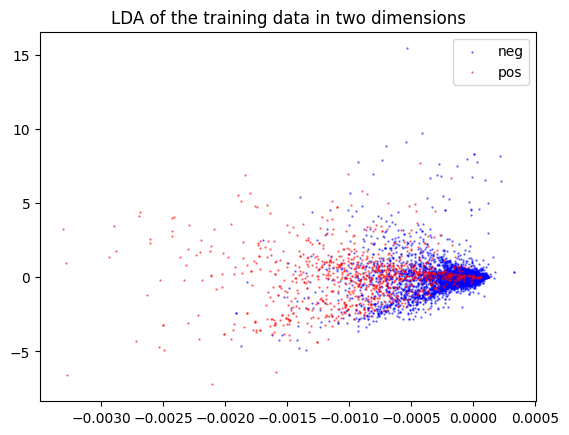

In [235]:
# Draw the two dimensional LDA plot
lda_data, components, component_eigenvalues = lda(training_data, training_class, 2)

lda_neg_values = lda_data[neg_indices]
lda_pos_values = lda_data[pos_indices]

plt.scatter(lda_neg_values[:, 0], lda_neg_values[:, 1], s=0.5, alpha=0.5, c='b', label='neg')
plt.scatter(lda_pos_values[:, 0], lda_pos_values[:, 1], s=0.5, alpha=0.5, c='r', label='pos')
plt.title('LDA of the training data in two dimensions')
plt.legend()
plt.show()

Not as severely intertwined as the PCA, LDA is still have some issue making the classes intertwined. But there is some clear eperation afer a point in the cluster.

One problem that I had during my LDA implementation is, $S_w$ vector was singular, therefore there was no inverse, therefore I had to add little diagonal value to make it invertible, but sometimes my eigenvectors were coming with imaginary parts. I had to clip those imaginary parts.

## 2.4.3 Factor Analysis

In [236]:
def fa(data, num_factors):
    AAt = np.dot(data.T, data)

    # Decompose using SVD
    u, s, v = np.linalg.svd(AAt)

    # Get the eigenvalues and eigenvectors
    eigenvalues = s
    eigenvectors = u

    # Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Get the first num_factors eigenvectors
    eigenvectors = eigenvectors[:, :num_factors]

    # Get the factor loadings
    factor_loadings = np.dot(data, eigenvectors)

    return factor_loadings, eigenvalues, eigenvectors


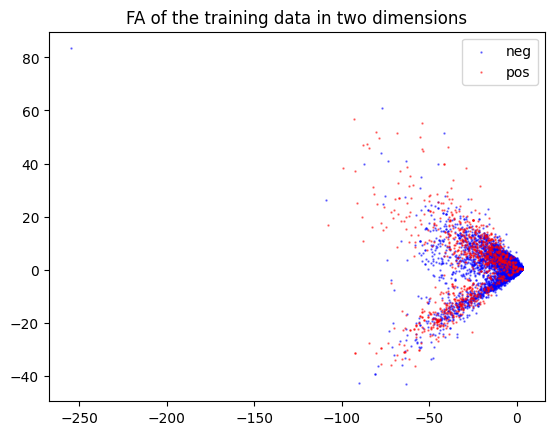

In [237]:
# Draw the two dimensional FA plot
fa_data, eigenvalues, eigenvectors = fa(training_data, 2)

fa_neg_values = fa_data[neg_indices]
fa_pos_values = fa_data[pos_indices]

plt.scatter(fa_neg_values[:, 0], fa_neg_values[:, 1], s=0.5, alpha=0.5, c='b', label='neg')
plt.scatter(fa_pos_values[:, 0], fa_pos_values[:, 1], s=0.5, alpha=0.5, c='r', label='pos')
plt.title('FA of the training data in two dimensions')
plt.legend()
plt.show()


Factor analysis plot is very similar to the PCA's plot.

From the graphs above, as LDA seperates the data more effectively, we have decided to train our model using LDA.

# 3 Model Training

We have decided to use random forest algorithm to classify the data, since all of the values are sensor value which is incremented when an evnet occurs, therefore having tresholds & selecting the class that way made more sense compared to linear regression. Also, we compared linear regression with random forest (submitted in the Kaggle contest), and random forest performed better while scores being around 7000 for random forest and around 114000 for linear regression. 

## 3.1 Feature Engineering

Dataset is quite imbalanced, 59000 of the data belonging to negative class and 1000 of the data belonging to positive class. We had to solve this because random forest algorithm gets negatively affected with these imbalances. One way to mitigate this is the usage of undersampler, which removes data from the majority class so that the data gets balanced.

One negative downside of this approach is, it negatively affects the outlier issue, if the outlier is in the reduced majority class and the loss of training data.

We had to use imblearn library for undersampler.

In [238]:
from imblearn.under_sampling import RandomUnderSampler
from time import time

# Random seed for random under sampler
def random_seed():
    int(time())

#  Random undersampling
undersampler = RandomUnderSampler(
    random_state=random_seed(), sampling_strategy='majority')

# Undersample will work while doing cross validation

## 3.2 Model Training
As previously discussed, we have used random forest algorithm as our classifier. We had to impoort KFold, RandomForestClassifier from scikit-learn libary.

Also, our LDA was consisting of 75 components.

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# We will use the LDA with 75 components

best_classifier : RandomForestClassifier
best_score = 10000000000 # some big number 

lda_data, components, component_eigenvalues = lda(training_data, training_class, 75)

num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_seed())

# K fold cross validation
for train_index, test_index in kf.split(lda_data):
    X_train, X_test = lda_data[train_index], lda_data[test_index]
    y_train, y_test = training_class[train_index], training_class[test_index]

    # Undersample the data
    undersample_data, undersample_class = undersampler.fit_resample(X_train, y_train)

    # Train the random forest classifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=random_seed())
    classifier.fit(undersample_data, undersample_class)

    # Get the predictions
    predictions = classifier.predict(X_test)

    # Custom penalizer function
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Penalizer in the kaggle
    score = 50 * fp + 10 * fn

    print("Iteration score: ", score, " fp: ", fp, " fn: ", fn )

    if score < best_score:
        best_score = score
        best_classifier = classifier

Iteration score:  36580  fp:  731  fn:  3
Iteration score:  34650  fp:  692  fn:  5
Iteration score:  37830  fp:  755  fn:  8
Iteration score:  37500  fp:  749  fn:  5
Iteration score:  36590  fp:  730  fn:  9


In [240]:
# Now, let's test our classifier on the testing data
testing_data = testing_data_frame.drop(columns=['id', 'cd_000'] + cols_to_drop).values
testing_id = testing_data_frame['id'].values

# Apply the zscore normalization to the data
testing_dataframe = applyZscoreNormalization(testing_data, training_data_mean, training_data_std)

# Impute the missing values with the mean value
testing_dataframe = imputeMean(testing_dataframe)

# Project the data onto the LDA components
testing_data = np.dot(testing_dataframe, components)

# Get the predictions
predictions = best_classifier.predict(testing_data)

resullt_frame = pd.DataFrame({'id': testing_id, 'class': predictions})
resullt_frame.to_csv('result1.csv', index=False)

Our models trained here had scores between 7000 and 8000 in the kaggle.

### 3.2.1 Other Models

We trained another type of model too, without dropping any columns this time. It scored higher than the our initial model. We generated that sample in the training_trials/lda_submission.py

They had very varied range of results, while the best one is being 6290, our current Kaggle score.

Below, a code snippet of that is shown:


In [241]:
import numpy as np
import pandas as pd
import preprocessing.normalizer as nmr
import preprocessing.imputer as imp
from preprocessing.lda import lda
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import time

data_frame = pd.read_csv('data/aps_failure_training_set.csv', na_values='na')

cols_to_drop = []
# for col in data_frame.columns:
#     if data_frame[col].isna().mean() > 0.70:
#         cols_to_drop.append(col)

training_data = data_frame.drop(columns=['id', 'class'] + cols_to_drop).values
training_class = data_frame['class'].values


def random_seed(): return int(time.time())


lda_size = 75

# Trying different normalization methods
test_frame = pd.read_csv('data/aps_failure_test_set.csv', na_values='na')
test_data = test_frame.drop(columns=['id'] + cols_to_drop).values
test_ids = test_frame['id'].values

nrm_strat = 0
imp_strat = 0

if nrm_strat == 0:
    strategy = 'zscore'
    training_data, mean, std = nmr.zscore_normalize(
        training_data)
    test_fold = nmr.applyZscoreNormalization(test_data, mean, std)
else:
    strategy = 'minmax'
    training_data, min, minmax = nmr.minmax_normalize(
        training_data)
    test_fold = nmr.applyMinmaxNormalization(test_data, min, minmax)

if imp_strat == 0:
    impute = 'mean'
    training_data = imp.imputeMean(training_data)
    test_fold = imp.imputeMean(test_fold)
elif imp_strat == 1:
    impute = 'median'
    training_data = imp.imputeMedian(training_data)
    test_fold = imp.imputeMedian(test_fold)
elif imp_strat == 2:
    impute = 'most_frequent'
    training_data = imp.imputeMostFrequent(training_data)
    test_fold = imp.imputeMostFrequent(test_fold)
elif imp_strat == 3:
    impute = 'zero'
    training_data = imp.imputeConstant(training_data, 0)
    test_fold = imp.imputeConstant(test_fold, 0)
else:
    impute = 'random'
    training_data = imp.imputeRandomFill(training_data)
    test_fold = imp.imputeRandomFill(test_fold)

print(f"current_iter: {strategy} {impute}")

# Applying LDA
projected_data, components, component_weights = lda(
    training_data, training_class, lda_size)


# Undersampling the data
undersampler = RandomUnderSampler(
    random_state=random_seed(), sampling_strategy='majority')

projected_data, training_class = undersampler.fit_resample(
    projected_data, training_class)


test_fold = np.dot(test_fold, components)

# Random forest classifier
random_forest = RandomForestClassifier(
    n_estimators=100, random_state=random_seed())

random_forest.fit(projected_data, training_class)

# Testing the model

predict_labels = random_forest.predict(test_fold)

# Calculating the accuracy
file_name = (
    f'{strategy}_{impute}_random_forest_after_{lda_size}_component_lda')

ids = test_frame['id'].to_list()
resullt_frame = pd.DataFrame({'id': ids, 'class': predict_labels})
resullt_frame.to_csv(
    f'data/automated_tests/{file_name}.csv', index=False)

ids = test_frame['id'].to_list()
resullt_frame = pd.DataFrame({'id': ids, 'class': predict_labels})
resullt_frame.to_csv(
    f'data/automated_tests/{file_name}.csv', index=False)


current_iter: zscore mean


# 4 About Kaggle Submissions

## 4.1 About Our Documented Approach

We have this approach documented in this Jupyter Notebook initially. Then we decided to train and test different methods, and submit them to Kaggle. our shown score in the Kaggle is our best submission, which is the submission explained below.

## 4.2 About Our Best Submission

Our best submission is achieved with using z-score normalization, mean value imputing, LDA with 75 components, using the random forest algorithm, without droping any columns.

Results might vary since our seet is dependent on time.

We have generated these trainings using the lda_submission.py under training trials folder.

Our best result is documented in the automated_tests folder under data. It is called: "zscore_mean_random_forest_75_component_lda_best_result.csv".

The code for automated testers are shown under the training_trials folder.